In [1]:
#!pip install pycountry
#!pip install langdetect

In [2]:
#!pip install python-twitter 

In [3]:
#!pip install tweepy

In [4]:
import os
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
warnings.filterwarnings("ignore")
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from tqdm._tqdm_notebook import tqdm_notebook
import re
#!pip install tweet-preprocessor
import preprocessor as p
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
tqdm_notebook.pandas()
import string
import nltk
from sklearn.decomposition import NMF, LatentDirichletAllocation
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import warnings
import pyLDAvis.gensim_models
import spacy
from pprint import pprint
warnings.filterwarnings("ignore",category=DeprecationWarning)
#nltk.download('punkt')
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob.sentiments import NaiveBayesAnalyzer, PatternAnalyzer
from textblob import Blobber
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import seaborn as sns
os.chdir('/Users/disasterdaya/Desktop/Taco Bell')

In [5]:
nltk.downloader.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/disasterdaya/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [6]:
import sys
import operator
import requests
import json
import twitter
import tweepy as tw

## Obtaining data from Twitter API

In [7]:
twitter_consumer_key = 'WKrocm47C4rDgIFSysKvRtROf'
twitter_consumer_secret = 'OctQbSqkNtbPSTlqx0s3NqC3awHclqalykOGsYpPllx4rx9h2Y'
twitter_access_token = '31242087-4zFFFCcUURrZxE6UnlloJeRlXL6c2mv6hfn9Bh8E4'
twitter_access_secret = 'DU2XSkT2fMouhKnJZrwxJCyrHyONeqww70Yu9Vn4N4SeK'



In [8]:
twitter_api = twitter.Api(consumer_key = twitter_consumer_key, 
                          consumer_secret = twitter_consumer_secret, 
                          access_token_key = twitter_access_token, 
                          access_token_secret = twitter_access_secret)

In [9]:
auth = tw.OAuthHandler(twitter_consumer_key, twitter_consumer_secret)
auth.set_access_token(twitter_access_token, twitter_access_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [10]:
# Define the search term and the date_since date as variables
search_words = ["Taco Bell", "Mexican Pizza"]
date_since = "2020-11-01"
date_until = "2020-12-31"

In [11]:
# Collect tweets
tweets = tw.Cursor(api.search,
              q=search_words,
              lang="en",
              since=date_since).items(1000)
tweets

In [12]:
# https://towardsdatascience.com/how-to-build-a-dataset-from-twitter-using-python-tweepy-861bdbc16fa5
output = []
for tweet in tweets:
    text = tweet._json["text"]
    print(text)
    favourite_count = tweet.favorite_count
    retweet_count = tweet.retweet_count
    #user_mentions = tweet.user_mentions
    #location = tweet.location
    created_at = tweet.created_at
    
    line = {'text' : text, 'favourite_count' : favourite_count, 'retweet_count' : retweet_count, 'created_at' : created_at}
    output.append(line)

@be_Zanazar I think its just woefully clear that you don’t understand that A: Little Caesar’s is about as Italian a… https://t.co/TvxeDwj43p
@xSaltsicle I’m sorry off topic but I cant scroll past a Taco Bell reference without declaring I’m still *pissed* a… https://t.co/xCwSgk9Km2
RT @_spoon47: I’ll never forgive Taco Bell for getting rid of the Mexican pizza.
RT @FineAssFrankie: I think Taco Bell taking mexican pizza off their menu is one of this generations greatest losses.
RT @FineAssFrankie: I think Taco Bell taking mexican pizza off their menu is one of this generations greatest losses.
RT @FineAssFrankie: I think Taco Bell taking mexican pizza off their menu is one of this generations greatest losses.
RT @dmkss3: if y’all see me in all the taco bell comments demanding mexican pizza back mind your business
Taco Bell needs to bring back the Mexican pizza 🥲
taco bell bring back the mexican pizza challenge
@Simone_Biles Imo's is the worst St. Louis style pizza. They're an embarrassme

I never thought I would miss Taco Bell’s Mexican pizza this much.
RT @_DLataye: I just dont understand why Taco Bell took mexican pizza off the menu..
RT @gabebergado: i long for the touch of a taco bell mexican pizza
@Laserb_INFJ @proudayouu Taco Bell has sadly gone downhill in the last decade.  Skimping on ingredients, cutting ou… https://t.co/UJJ91tNb6o
When Taco Bell took away the Mexican Pizza it became personal for me.
Taco Bell.. Save the Mexican Pizza - Sign the Petition! https://t.co/xqdJHGYsho via @Change
@tacobell @DojaCat @FeedTheBeat @DojaCat can you tell Taco Bell to bring back the Mexican Pizza?
@Jax Mexican Pizza from taco bell
Italian Chicken from burger king
Us: Bring back the Mexican Pizza

Taco Bell:
https://t.co/IUlVkibGi1
Us: Bring back the Mexican Pizza

Taco Bell:
https://t.co/TiHczY2nJk
@FF_LeapOfFaith @FFTylerO @Envisionff @drewmet_FF @JMoeller05 @ff_rebel @ItsTeraTime @Mustaine3651 @Matt2Frosty… https://t.co/yD5VEipzcb
@Dibol1987 @ErmannoRavioli @KyleKashuv T

### Saving data to CSV file

In [13]:
#import pandas as pd
df = pd.DataFrame(output)
df.to_csv('output.csv')
df

,text,favourite_count,retweet_count,created_at
0,@be_Zanazar I think its just woefully clear th...,0,0,2021-06-30 01:13:49
1,@xSaltsicle I’m sorry off topic but I cant scr...,1,0,2021-06-30 01:06:20
2,RT @_spoon47: I’ll never forgive Taco Bell for...,0,6,2021-06-30 00:37:48
3,RT @FineAssFrankie: I think Taco Bell taking m...,0,20,2021-06-30 00:24:52
4,RT @FineAssFrankie: I think Taco Bell taking m...,0,20,2021-06-30 00:24:30
...,...,...,...,...
159,@AliothFox Taco Bell died when they got rid of...,0,0,2021-06-21 23:29:18
160,To all my youngsters.....don't get comfortable...,5,0,2021-06-21 23:09:51
161,Taco Bell: There's a Chance Mexican Pizza Retu...,0,0,2021-06-21 22:57:37
162,@SuperBeardBros @FacianeA @ShaperofStories @Co...,3,0,2021-06-21 19:41:09


## Data Cleaning

In [14]:
# splitting time stamp to date and time variables 
date, time = zip(*[(d.date(), d.time()) for d in df['created_at']])
df = df.assign(date=date, time=time)


In [15]:
# https://towardsdatascience.com/step-by-step-twitter-sentiment-analysis-in-python-d6f650ade58d

### Text processing

In [16]:
# Removing Emojis, Mentions and URLs from tweets
df['Clean'] = df.progress_apply(lambda x: p.clean(str(x['text'])), axis = 1)
df = df[df['Clean'] != ''].reset_index(drop = True)

In [17]:
# Removing Digits
df['Clean'] = df['Clean'].astype(str).str.replace('\d+', '')

In [18]:
# Changing all text to lowercase
df['Clean'] = df['Clean'].str.lower()

In [19]:
# Removing Punctuations
def puncRemover(text):
    to_return = []
    for word in text.split():
        updatedWord = re.sub(r'[^\w\s]', '', word)
        if len(updatedWord) > 0:
            to_return.append(updatedWord)
    return ' '.join(to_return)
    
df['Clean'] = df.progress_apply(lambda x: puncRemover(x['Clean']), axis = 1)

In [27]:
# Removing Stop Words
stopwords = set(STOPWORDS)
stopwords = stopwords.union({"taco bell", "taco", "bell", "n", 'today', 'yea', 'still', 'mexican', 'pizza', 'food','menu', 'think', 'one',
                            'pizzataco', "taking", 'off', 'cheeseburger', 'jack', 'box', 'mcdonalds', 'mexi', 'melt', 'bacon', 
                             'sausage', 'mcmuffin', "got", 'go, '"getting", 'rid', 'm', 't', 's', 'meximelt', 'ill','really','now','start',
                            'dont','sick', 'years', 'ultimate','egg', 'mcd', 'happened', 'long','touch', 'thought','need', 'right',
                            'way', 'know',
                            'make', 'people', 'new', 'try', 'thing', 'take', 'style', 'embarrassment', 'need', 'real',
                            'chicken', 'see', 'will',
                            'point', 'even',
                            'business', 'basis',
                            'be', 'sauce', 'make', 'get', 'return', 'mind',
                            'get', 'go',
                            'commercial', 'power', 'say',
                            'remove', 'get', 'make', 'bell', 
                            'be', 'assume', 'need',
                            'can', 'clear',
                            'getting'})

def stopRemover(text):
    to_return = []
    for word in text.split():
        if word not in stopwords:
            if len(word) >= 3:
                to_return.append(word)
    return ' '.join(to_return)
df['Clean'] = df.progress_apply(lambda x: stopRemover(x['Clean']), axis = 1)

In [28]:
# Removing only one word or empty tweets
df['CleanLength'] = df.progress_apply(lambda x: len(x['Clean'].split()), axis = 1)
df = df[df['CleanLength'] > 1].reset_index(drop = True)
df = df[['text', 'created_at', 'date', 'time', 'Clean']]
df = df.sort_values(by = 'created_at').reset_index(drop = True)
#df = df[['text', 'date', 'time', 'Clean']]


## Text Analysis

In [29]:
# Stemming words removes or stems the last few characters of a word
stemmer = PorterStemmer()
def stemTokenizer(text):
    return [stemmer.stem(item) for item in list(word_tokenize(word) for word in sent_tokenize(text))[0]]

In [30]:
# lematization considers contxt and converts word into its meaningful base form
lematizer = WordNetLemmatizer()
def lemmaTokenizer(text):
    return [lematizer.lemmatize(item) for item in list(word_tokenize(word) for word in sent_tokenize(text))[0]]

In [31]:
df['Stemmed'] = df.progress_apply(lambda x: stemTokenizer(x['Clean']), axis = 1)
df['Lemmatized'] = df.progress_apply(lambda x: lemmaTokenizer(x['Clean']), axis = 1)

In [32]:
df

,text,created_at,date,time,Clean,Stemmed,Lemmatized
0,@tacobell Taco John’s is my new favorite till ...,2021-06-21 19:11:54,2021-06-21,19:11:54,johns favorite till comes back,"[john, favorit, till, come, back]","[john, favorite, till, come, back]"
1,@SuperBeardBros @FacianeA @ShaperofStories @Co...,2021-06-21 19:41:09,2021-06-21,19:41:09,systemically destroyed every,"[system, destroy, everi]","[systemically, destroyed, every]"
2,Taco Bell: There's a Chance Mexican Pizza Retu...,2021-06-21 22:57:37,2021-06-21,22:57:37,theres chance returns back,"[there, chanc, return, back]","[there, chance, return, back]"
3,To all my youngsters.....don't get comfortable...,2021-06-21 23:09:51,2021-06-21,23:09:51,youngstersdont comfortable fast menus older ge...,"[youngstersdont, comfort, fast, menu, older, g...","[youngstersdont, comfortable, fast, menu, olde..."
4,@DearAuntAbby @robin_991 Genius. I want one f...,2021-06-22 00:16:42,2021-06-22,00:16:42,genius want cinnamon twists diet pepsi,"[geniu, want, cinnamon, twist, diet, pepsi]","[genius, want, cinnamon, twist, diet, pepsi]"
...,...,...,...,...,...,...,...
125,RT @FineAssFrankie: I think Taco Bell taking m...,2021-06-30 00:24:30,2021-06-30,00:24:30,generations greatest losses,"[gener, greatest, loss]","[generation, greatest, loss]"
126,RT @FineAssFrankie: I think Taco Bell taking m...,2021-06-30 00:24:52,2021-06-30,00:24:52,generations greatest losses,"[gener, greatest, loss]","[generation, greatest, loss]"
127,RT @_spoon47: I’ll never forgive Taco Bell for...,2021-06-30 00:37:48,2021-06-30,00:37:48,never forgive,"[never, forgiv]","[never, forgive]"
128,@xSaltsicle I’m sorry off topic but I cant scr...,2021-06-30 01:06:20,2021-06-30,01:06:20,sorry topic cant scroll past reference without...,"[sorri, topic, cant, scroll, past, refer, with...","[sorry, topic, cant, scroll, past, reference, ..."


#### Testing out N-grams to find the most information

In [33]:
tfidf = TfidfVectorizer(min_df = 2, max_df = 0.8, ngram_range=(1, 1))
tfidf.fit_transform(df['Clean'].values)
tfidf_table = pd.DataFrame(columns=['tfidf']).from_dict(dict(zip(tfidf.get_feature_names(), tfidf.idf_)), orient='index')
tfidf_table.columns = ['tfidf']
tfidf_table = tfidf_table.sort_values(by = ['tfidf'], ascending = True)
tfidf_table.head(10)

,tfidf
back,2.474000
bring,2.656321
greatest,2.879465
generations,2.879465
losses,2.879465
never,3.677973
forgive,3.795756
needs,3.929287
away,4.083438
cant,4.083438


In [34]:
tfidf = TfidfVectorizer(min_df = 2, max_df = 0.8, ngram_range=(2, 2))
tfidf.fit_transform(df['Clean'].values)
tfidf_table = pd.DataFrame(columns=['tfidf']).from_dict(dict(zip(tfidf.get_feature_names(), tfidf.idf_)), orient='index')
tfidf_table.columns = ['tfidf']
tfidf_table = tfidf_table.sort_values(by = ['tfidf'], ascending = True)
tfidf_table.head(10)

,tfidf
bring back,2.697143
greatest losses,2.879465
generations greatest,2.879465
never forgive,3.795756
upsets daily,4.265759
loyalty disbelief,4.488903
sign petition,4.488903
save sign,4.488903
needs bring,4.488903
petition via,4.488903


In [35]:
tfidf = TfidfVectorizer(min_df = 2, max_df = 0.8, ngram_range=(3, 3))
tfidf.fit_transform(df['Clean'].values)
tfidf_table = pd.DataFrame(columns=['tfidf']).from_dict(dict(zip(tfidf.get_feature_names(), tfidf.idf_)), orient='index')
tfidf_table.columns = ['tfidf']
tfidf_table = tfidf_table.sort_values(by = ['tfidf'], ascending = True)
tfidf_table.head(10)

,tfidf
generations greatest losses,2.879465
loyalty disbelief needs,4.488903
sign petition via,4.488903
save sign petition,4.488903
needs bring back,4.488903
trying bring joy,4.776585
theres chance returns,4.776585
promises locations serving,4.776585
please bring back,4.776585
back trying bring,4.776585


In [36]:
tfidf = TfidfVectorizer(min_df = 2, max_df = 0.8, ngram_range=(4, 4))
tfidf.fit_transform(df['Clean'].values)
tfidf_table = pd.DataFrame(columns=['tfidf']).from_dict(dict(zip(tfidf.get_feature_names(), tfidf.idf_)), orient='index')
tfidf_table.columns = ['tfidf']
tfidf_table = tfidf_table.sort_values(by = ['tfidf'], ascending = True)
tfidf_table.head(10)

,tfidf
save sign petition via,4.488903
back trying bring joy,4.776585
bring back trying bring,4.776585
bring joy back shit,4.776585
clutch wanna away best,4.776585
iffy promises locations serving,4.776585
trying bring joy back,4.776585
yall comments demanding back,4.776585


In [53]:
tfidf = TfidfVectorizer(min_df = 2, max_df = 0.8, ngram_range=(2, 4))
tfidf.fit_transform(df['Clean'].values)
tfidf_table = pd.DataFrame(columns=['tfidf']).from_dict(dict(zip(tfidf.get_feature_names(), tfidf.idf_)), orient='index')
tfidf_table.columns = ['tfidf']
tfidf_table = tfidf_table.sort_values(by = ['tfidf'], ascending = True)
tfidf_table.head(10)

,tfidf
bring back,2.697143
greatest losses,2.879465
generations greatest losses,2.879465
generations greatest,2.879465
never forgive,3.795756
upsets daily,4.265759
save sign petition,4.488903
needs bring,4.488903
needs bring back,4.488903
petition via,4.488903


## Topic Modeling

### NMF Model Topics

In [54]:
def printTopics(model, featureNames, n_top_words):
    for index, topic in enumerate(model.components_):
        print('TOPIC {}:'.format(index + 1))
        print(' '.join([featureNames[i] for i in topic.argsort()[:-n_top_words - 1 :-1]]))
        print('\n')

In [55]:
tfidf = TfidfVectorizer(min_df = 2, max_df = 0.8, ngram_range = (2, 4))
tfidf.fit_transform(df['Clean'].values)
NMFModel = NMF(init = "nndsvd", n_components = 10, max_iter=200, random_state=0)
NMFModel.fit_transform(tfidf.fit_transform(df['Clean'].values)) 
printTopics(NMFModel, tfidf.get_feature_names(), 10)

TOPIC 1:
greatest losses generations greatest losses generations greatest yall comments demanding back clutch wanna away iffy promises locations iffy promises everything bring back everything bring disbelief needs


TOPIC 2:
bring back everything bring please bring please bring back everything bring back joy back bring joy joy back shit bring joy back shit bring joy back


TOPIC 3:
never forgive yall comments demanding back clutch wanna away iffy promises greatest losses generations greatest losses generations greatest everything bring back everything bring disbelief needs


TOPIC 4:
upsets daily yall comments demanding back clutch wanna iffy promises greatest losses generations greatest losses generations greatest everything bring back everything bring disbelief needs


TOPIC 5:
loyalty disbelief loyalty disbelief needs disbelief needs yall comments demanding back iffy promises locations serving iffy promises greatest losses generations greatest losses generations greatest everything 

### LDA Model Topics

In [56]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

In [57]:
data_words = list(sent_to_words(df.Clean.to_list()))
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100)
bigram_mod = gensim.models.phrases.Phraser(bigram)

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

data_words_bigrams = make_bigrams(data_words)

In [58]:
nlp = spacy.load("en_core_web_sm")

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

In [59]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

In [64]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=3, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [65]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.129674  0.112359       1        1  40.852180
1      0.212887  0.017630       2        1  32.539512
0     -0.083213 -0.129989       3        1  26.608309, topic_info=           Term       Freq      Total Category  logprob  loglift
187       great  25.000000  25.000000  Default  30.0000  30.0000
186  generation  25.000000  25.000000  Default  29.0000  29.0000
188        loss  25.000000  25.000000  Default  28.0000  28.0000
0          back  24.000000  24.000000  Default  27.0000  27.0000
28        bring  18.000000  18.000000  Default  26.0000  26.0000
..          ...        ...        ...      ...      ...      ...
108    downhill   0.619441   1.096800   Topic3  -5.1711   0.7526
107      decade   0.619441   1.096800   Topic3  -5.1711   0.7526
106         cut   0.619441   1.096801   Topic3  -5.1711   0.7526
57           go   1.759889   4.103886   Topic3  -4.1270   0.4773
13         want   0.999370   2.527002   Topic3  -4.6928   0.3963

[135 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
50        1  0.845082    always
88        1  0.872639   anymore
26        2  0.919419      away
0         1  0.993151      back
60        2  0.825460        be
...     ...       ...       ...
13        1  0.395726      want
13        2  0.395726      want
13        3  0.395726      want
27        2  0.769178      well
201       3  0.781247  woefully

[95 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 1])

#### LDA Evaluation using Perplexity and Coherence

In [66]:
# https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -5.301564456558809

Coherence Score:  0.6525353249900937


In [67]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

# 3 distinct topics
# Topic 1: Bring back the Mexican Pizza
# Topic 2: Great loss
# Topic 3: Emotions and forgivness

[(0,
  '0.043*"never" + 0.040*"forgive" + 0.033*"can" + 0.033*"make" + '
  '0.019*"reference" + 0.019*"past" + 0.019*"pissed" + 0.019*"declare" + '
  '0.019*"scroll" + 0.019*"topic"'),
 (1,
  '0.186*"generation" + 0.186*"great" + 0.186*"loss" + 0.014*"be" + '
  '0.012*"away" + 0.008*"petition" + 0.008*"sign" + 0.008*"save" + '
  '0.006*"want" + 0.006*"bell"'),
 (2,
  '0.142*"back" + 0.109*"bring" + 0.029*"need" + 0.029*"comment" + '
  '0.029*"demand" + 0.018*"anymore" + 0.015*"challenge" + 0.015*"sad" + '
  '0.013*"go" + 0.010*"s"')]


#### Assigning which tweet belongs to which topic

In [112]:
def getDominantTopic(List):
    topics = list(lda_model.get_document_topics(id2word.doc2bow(List)))
    topic_dict = {0: 'Topic 1', 1: 'Topic 2', 2: 'Topic 3'}
    # 0: Needs, 1: Reaction, 2: Feelings
    max_score = max([i[1] for i in topics])
    dom_topic = [i[0] for i in topics if i[1] == max_score]
    return topic_dict[dom_topic[0]]

In [113]:
df['Topic'] = df.progress_apply(lambda x: getDominantTopic(x['Stemmed']), axis = 1)
#df['LemTopic'] = df.progress_apply(lambda x: getDominantTopic(x['Lemmatized']), axis = 1)

In [114]:
df.head()

,text,created_at,date,time,Clean,Stemmed,Lemmatized,Topic,Polarity,Subjectivity,...,VaderSentiment,Compound,CombinedSentiment,FrequentSentiment,TextBlob_Subjectivity_Clean,TextBlob_Polarity_Clean,TextBlob_Analysis_Clean,TextBlob_Subjectivity_text,TextBlob_Polarity_text,TextBlob_Analysis_text
0,@tacobell Taco John’s is my new favorite till ...,2021-06-21 19:11:54,2021-06-21,19:11:54,johns favorite till comes back,"[john, favorit, till, come, back]","[john, favorite, till, come, back]",Topic 3,0.250000,0.500000,...,Neutral,0.4588,"[Positive, Neutral, Positive]",Positive,0.500000,0.250000,Positive,0.363636,0.159091,Positive
1,@SuperBeardBros @FacianeA @ShaperofStories @Co...,2021-06-21 19:41:09,2021-06-21,19:41:09,systemically destroyed every,"[system, destroy, everi]","[systemically, destroyed, every]",Topic 1,0.000000,0.000000,...,Negative,-0.4939,"[Positive, Negative, Neutral]",Negative,0.000000,0.000000,Neutral,0.454545,0.136364,Positive
2,Taco Bell: There's a Chance Mexican Pizza Retu...,2021-06-21 22:57:37,2021-06-21,22:57:37,theres chance returns back,"[there, chanc, return, back]","[there, chance, return, back]",Topic 3,0.000000,0.000000,...,Neutral,0.2500,"[Negative, Neutral, Neutral]",Neutral,0.000000,0.000000,Neutral,0.000000,0.000000,Neutral
3,To all my youngsters.....don't get comfortable...,2021-06-21 23:09:51,2021-06-21,23:09:51,youngstersdont comfortable fast menus older ge...,"[youngstersdont, comfort, fast, menu, older, g...","[youngstersdont, comfortable, fast, menu, olde...",Topic 2,0.255556,0.577778,...,Neutral,0.5106,"[Positive, Neutral, Positive]",Positive,0.577778,0.255556,Positive,0.558333,0.316667,Positive
4,@DearAuntAbby @robin_991 Genius. I want one f...,2021-06-22 00:16:42,2021-06-22,00:16:42,genius want cinnamon twists diet pepsi,"[geniu, want, cinnamon, twist, diet, pepsi]","[genius, want, cinnamon, twist, diet, pepsi]",Topic 1,0.000000,0.000000,...,Neutral,0.0772,"[Positive, Neutral, Neutral]",Neutral,0.000000,0.000000,Neutral,0.000000,0.000000,Neutral


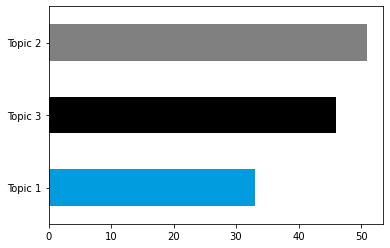

In [71]:
df['Topic'].value_counts().sort_values().plot(kind = 'barh', color = ['#009CDF', 'black', 'grey'])

### Sentiment Analysis


In [52]:
textblob = Blobber(analyzer = PatternAnalyzer())
textblob2 = Blobber(analyzer = NaiveBayesAnalyzer())
vader = SentimentIntensityAnalyzer()

In [72]:
def getPolarity(text):
    return textblob(text).sentiment.polarity

def getSubjectivity(text):
    return textblob(text).sentiment.subjectivity

def getNaiveSentiment(text):
    sentiment = textblob2(text).sentiment
    if sentiment.classification == 'neg':
        return 'Negative'
    elif sentiment.p_pos == sentiment.p_neg:
        return 'Neutral'
    else:
        return 'Positive'
    
def getPatternSentiment(polarity):
    if polarity < 0:
        return 'Negative'
    elif polarity == 0:
        return 'Neutral'
    else:
        return 'Positive'
    
def getVaderSentiment(text):
    sentiment = vader.polarity_scores(text)
    scores = [sentiment['neg'], sentiment['neu'], sentiment['pos']]
    
    if len(set(scores)) == 1:
        return 'Neutral'
    if max(scores) == sentiment['neg']:
        return 'Negative'
    elif max(scores) == sentiment['pos']:
        return 'Positive'
    elif max(scores) == sentiment['neu']:
        return 'Neutral'
    
def getCompound(text):
    return vader.polarity_scores(text)['compound']

def most_frequent(List):
    return max(set(List), key = List.count)

In [73]:
df['Polarity'] = df.progress_apply(lambda x: getPolarity(x['Clean']), axis = 1)
df['Subjectivity'] = df.progress_apply(lambda x: getSubjectivity(x['Clean']), axis = 1)
df['NaiveSentiment'] = df.progress_apply(lambda x: getNaiveSentiment(x['Clean']), axis = 1)
df['PatternSentiment'] = df.progress_apply(lambda x: getPatternSentiment(x['Polarity']), axis = 1)
df['VaderSentiment'] = df.progress_apply(lambda x: getVaderSentiment(x['Clean']), axis = 1)
df['Compound'] = df.progress_apply(lambda x: getCompound(x['Clean']), axis = 1)
df['CombinedSentiment'] = df.progress_apply(lambda x: [x['NaiveSentiment']] + [x['VaderSentiment']] + [x['PatternSentiment']], axis = 1)
df['FrequentSentiment'] = df.progress_apply(lambda x: most_frequent(x['CombinedSentiment']) , axis = 1)

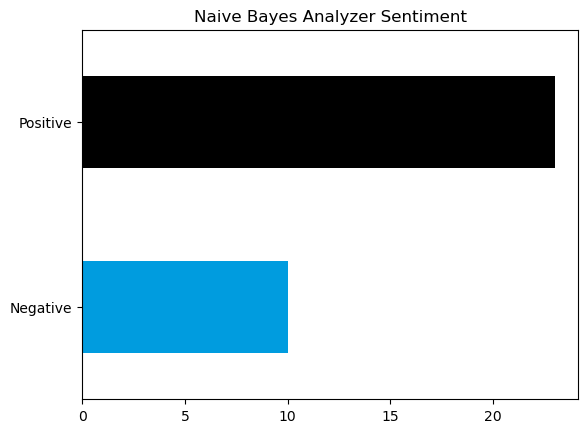

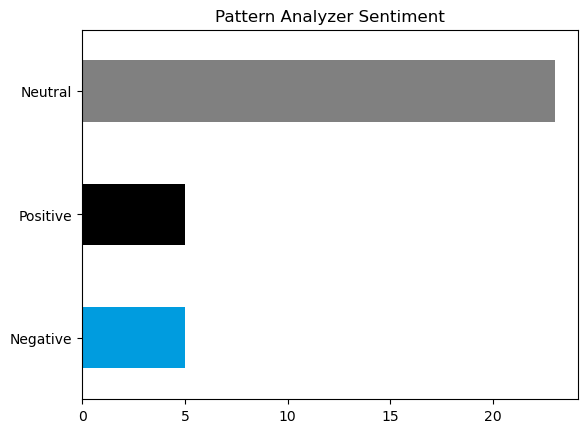

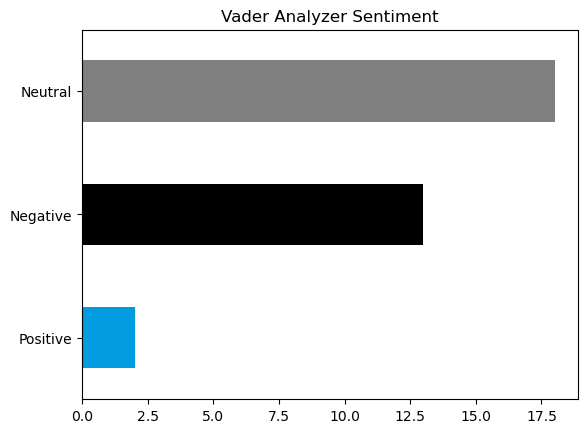

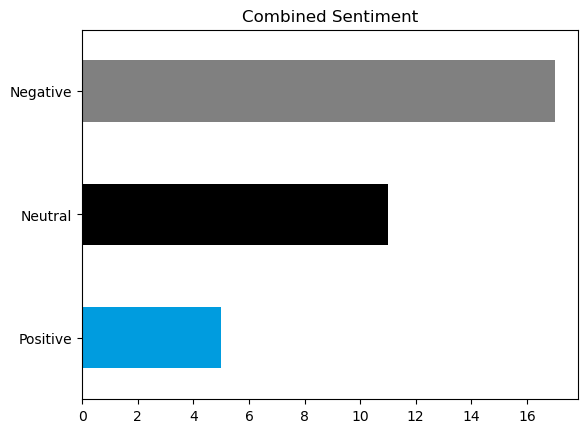

In [99]:
# Software Sentiment
df[df.Topic == 'Topic 1']['NaiveSentiment'].value_counts().sort_values().plot(kind = 'barh', color = ['#009CDF', 'black', 'grey'])
plt.title('Naive Bayes Analyzer Sentiment')
plt.show()
df[df.Topic == 'Topic 1']['PatternSentiment'].value_counts().sort_values().plot(kind = 'barh', color = ['#009CDF', 'black', 'grey'])
plt.title('Pattern Analyzer Sentiment')
plt.show()
df[df.Topic == 'Topic 1']['VaderSentiment'].value_counts().sort_values().plot(kind = 'barh', color = ['#009CDF', 'black', 'grey'])
plt.title('Vader Analyzer Sentiment')
plt.show()
df[df.Topic == 'Topic 1']['FrequentSentiment'].value_counts().sort_values().plot(kind = 'barh', color = ['#009CDF', 'black', 'grey'])
plt.title('Combined Sentiment')
plt.show()


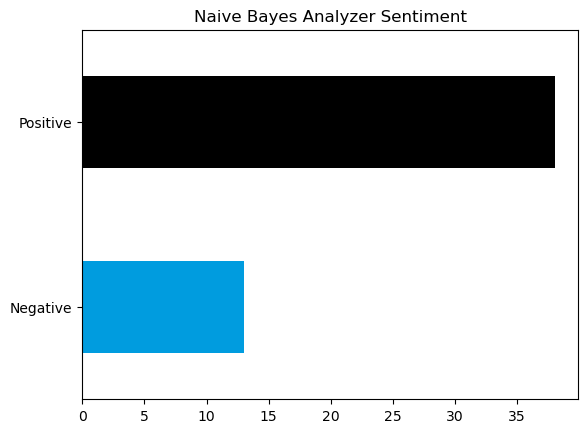

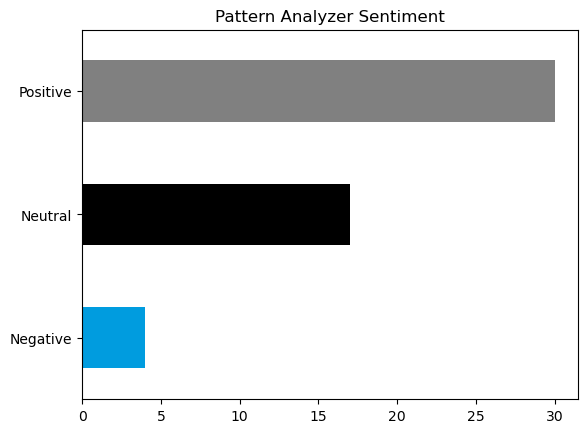

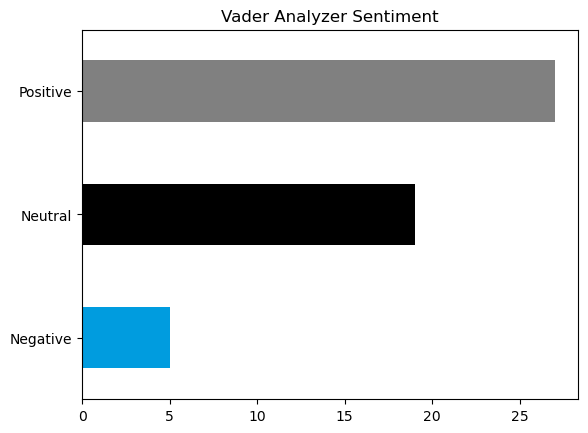

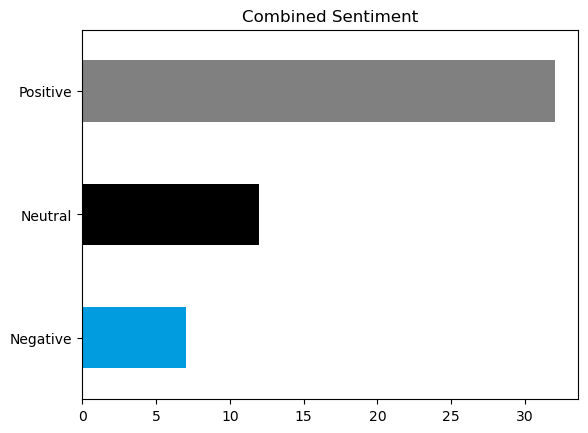

In [100]:
# Software Sentiment
df[df.Topic == 'Topic 2']['NaiveSentiment'].value_counts().sort_values().plot(kind = 'barh', color = ['#009CDF', 'black', 'grey'])
plt.title('Naive Bayes Analyzer Sentiment')
plt.show()
df[df.Topic == 'Topic 2']['PatternSentiment'].value_counts().sort_values().plot(kind = 'barh', color = ['#009CDF', 'black', 'grey'])
plt.title('Pattern Analyzer Sentiment')
plt.show()
df[df.Topic == 'Topic 2']['VaderSentiment'].value_counts().sort_values().plot(kind = 'barh', color = ['#009CDF', 'black', 'grey'])
plt.title('Vader Analyzer Sentiment')
plt.show()
df[df.Topic == 'Topic 2']['FrequentSentiment'].value_counts().sort_values().plot(kind = 'barh', color = ['#009CDF', 'black', 'grey'])
plt.title('Combined Sentiment')
plt.show()


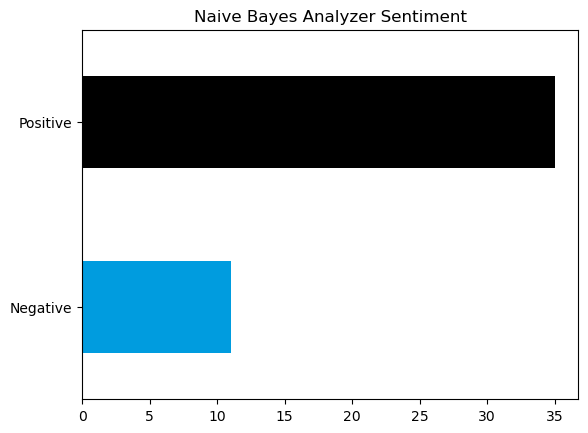

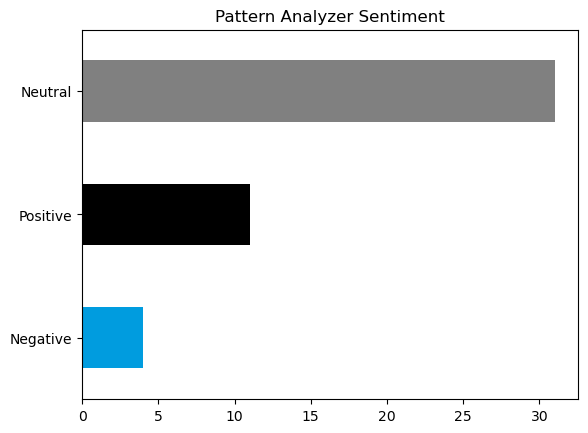

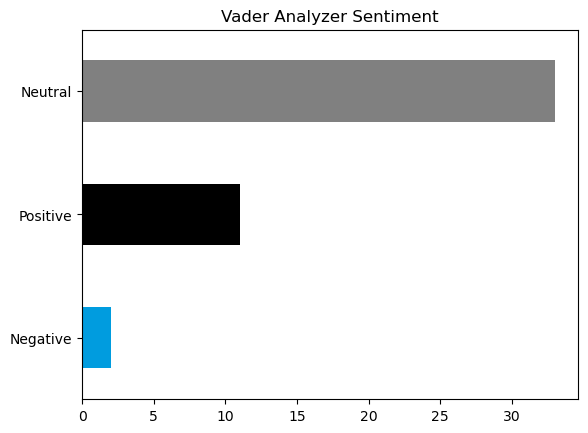

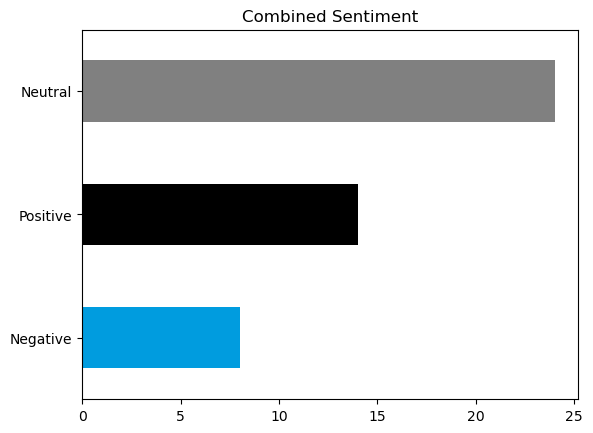

In [101]:
# Software Sentiment
df[df.Topic == 'Topic 3']['NaiveSentiment'].value_counts().sort_values().plot(kind = 'barh', color = ['#009CDF', 'black', 'grey'])
plt.title('Naive Bayes Analyzer Sentiment')
plt.show()
df[df.Topic == 'Topic 3']['PatternSentiment'].value_counts().sort_values().plot(kind = 'barh', color = ['#009CDF', 'black', 'grey'])
plt.title('Pattern Analyzer Sentiment')
plt.show()
df[df.Topic == 'Topic 3']['VaderSentiment'].value_counts().sort_values().plot(kind = 'barh', color = ['#009CDF', 'black', 'grey'])
plt.title('Vader Analyzer Sentiment')
plt.show()
df[df.Topic == 'Topic 3']['FrequentSentiment'].value_counts().sort_values().plot(kind = 'barh', color = ['#009CDF', 'black', 'grey'])
plt.title('Combined Sentiment')
plt.show()


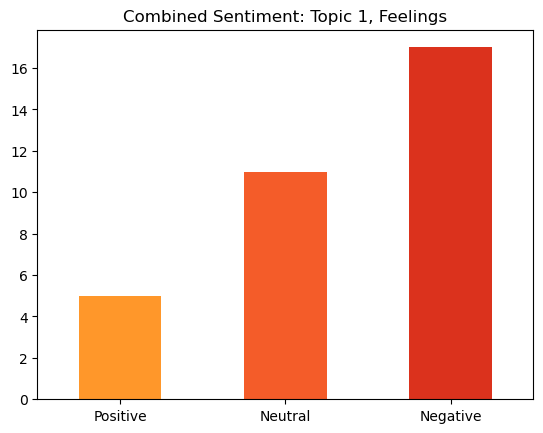

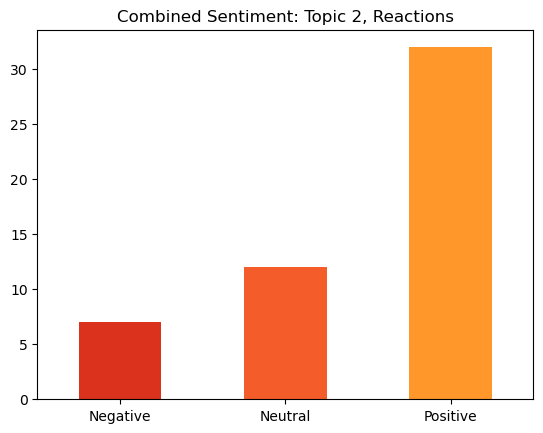

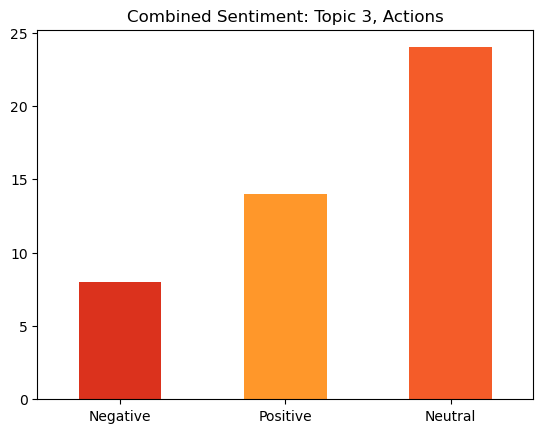

In [162]:
df[df.Topic == 'Topic 1']['FrequentSentiment'].value_counts().sort_values().plot(kind = 'bar', color = ['#ff972a', '#F45C29', '#DB321D'])
plt.xticks(rotation=0)
plt.title('Combined Sentiment: Topic 1, Feelings')
plt.show()

df[df.Topic == 'Topic 2']['FrequentSentiment'].value_counts().sort_values().plot(kind = 'bar', color = ['#DB321D', '#F45C29', '#ff972a'])
plt.xticks(rotation=0)
plt.title('Combined Sentiment: Topic 2, Reactions')
plt.show()

df[df.Topic == 'Topic 3']['FrequentSentiment'].value_counts().sort_values().plot(kind = 'bar', color = ['#DB321D', '#ff972a', '#F45C29'])
plt.xticks(rotation=0)
plt.title('Combined Sentiment: Topic 3, Actions')
plt.show()

### Wordcloud

In [81]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator # to create a Word Cloud


In [82]:
STOPWORDS.update(["taco bell", "taco", "bell", "n", 'today', 'yea', 'still', 'mexican', 'pizza', 'food','menu', 'think', 'one',
                            'pizzataco', "taking", 'off', 'cheeseburger', 'jack', 'box', 'mcdonalds', 'mexi', 'melt', 'bacon', 
                             'sausage', 'mcmuffin', "got", "getting", 'rid', 'm', 't', 's', 'meximelt'])

In [144]:
#Function to Create Wordcloud
def create_wordcloud(text, img_name):
    mask = np.array(Image.open("tb.jpeg"))
    stopwords_ = set(STOPWORDS)
    stopwords_ = stopwords_.union({'john', 'anymore', 'even','Lemmatized',
                            'new','length','sow'})
    wc = WordCloud(background_color="White", colormap="Purples", mask = mask, max_words=500, 
                   stopwords=stopwords_,repeat=True) #, collocation_threshold = threashold) #mask = mask

    wc.generate(str(text))
    wc.to_file(img_name)
    print("Word Cloud Saved Successfully")
    path = img_name
    display(Image.open(path))
   

Word Cloud Saved Successfully


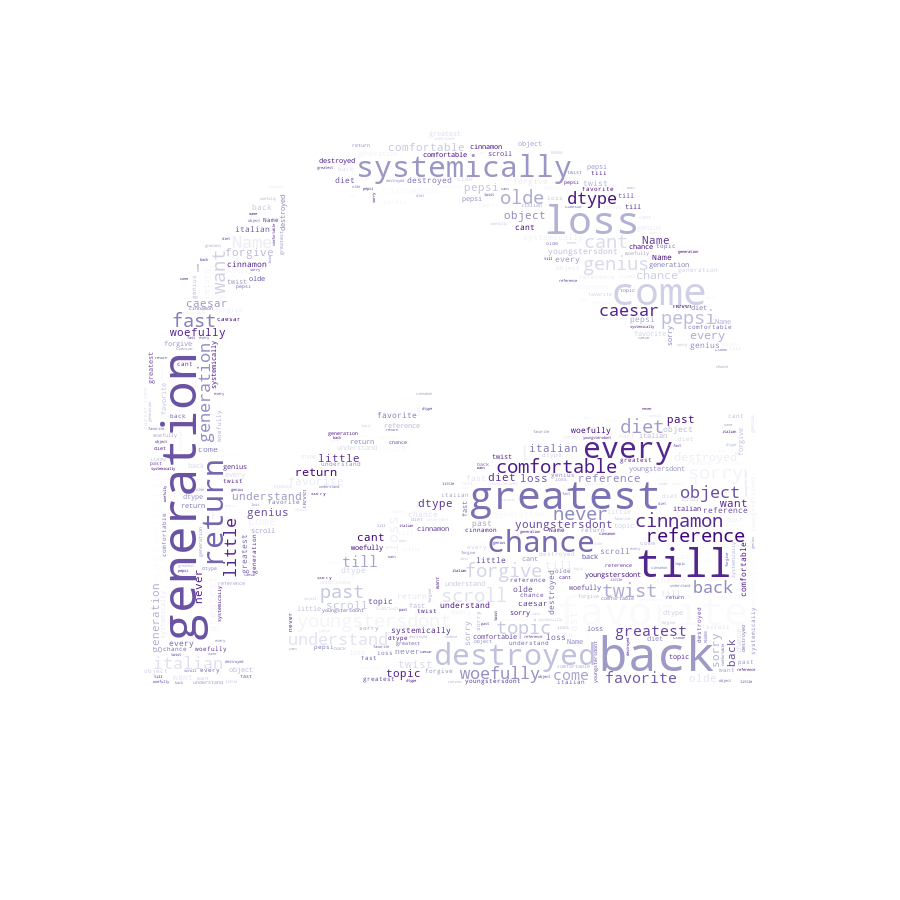

In [153]:
#Creating wordcloud for all tweets
create_wordcloud(df["Lemmatized"],'wc2.2.2.png')

Word Cloud Saved Successfully


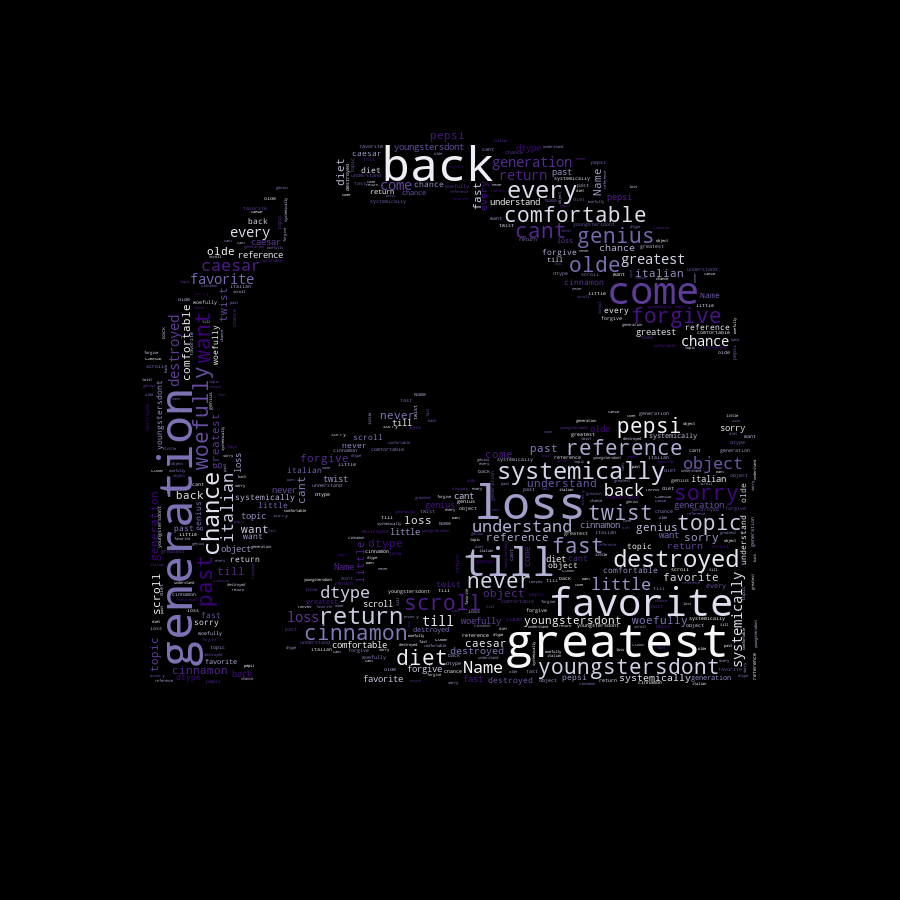

In [85]:
#Creating wordcloud for all tweets
create_wordcloud(df["Lemmatized"],'wc2.png')

In [127]:
df.loc[df['Topic'] == "Topic 1"]['text'][6]

'RT @mogirlprobs: Taco Bell getting rid of the Mexi Melt and the Mexican Pizza still upsets me on a daily basis.'

In [135]:
df.loc[df['Topic'] == "Topic 2"]['text']

3      To all my youngsters.....don't get comfortable...
9      @ChrisRGun Chris can you talk about Taco Bell ...
11     @ilovejohnkimble More importantly the God damn...
12     A Mexican pizza would be clutch rn but Taco Be...
15     @reptiliferous Not Taco Bell's delicious Mexic...
18     RT @Savage6_: A Mexican pizza would be clutch ...
21     Dear Taco Bell, I’m still mad that you got rid...
27     @ashberrier Since Taco Bell got rid of the Mex...
30     Taco Bell is still iffy on the return of the M...
32     I would do some shady stuff for a Mexican Pizz...
33     Taco Bell is still iffy on the return of the M...
35     @juicecrypt0 Bc Taco Bell discontinued the Mex...
36     @pizza4justice At a particular point in my lif...
38     life hasn’t been the same since they removed t...
45     @Dibol1987 @ErmannoRavioli @KyleKashuv Taco Be...
48     @Jax Mexican Pizza from taco bell\nItalian Chi...
50     Taco Bell.. Save the Mexican Pizza - Sign the ...
51     When Taco Bell took away

In [137]:
df['text'][68]

'😩😩😩😩 Taco Bell.. Save the Mexican Pizza - Sign the Petition! https://t.co/AIPkUcysXC via @Change'

In [140]:
df.loc[df['Topic'] == "Topic 3"]['text']

0      @tacobell Taco John’s is my new favorite till ...
2      Taco Bell: There's a Chance Mexican Pizza Retu...
8      @Gangstakittyboo Taco Bell had the Mexican Piz...
10     @AllianaSabrina Nowadays everyone is so sensit...
13     taco bell needs to bring back the mexican pizz...
17     RT @dmkss3: taco bell needs to bring back the ...
20     @W90404843 Aww, crap. What are the leftie comm...
22     Taco Bell can you bring back the Mexican pizza...
23     @simonefiii Could say this about all fast food...
25     @HPthahybrid @Dooney6_4 taco bell fire even th...
26     i’m so sick of the bs. after years of loyalty ...
28     RT @tjbarrios1: i’m so sick of the bs. after y...
29     RT @tjbarrios1: i’m so sick of the bs. after y...
39     RT @DojaCat: I will do everything in my power ...
40     I think I’m gonna boycott Taco Bell until they...
44     Living in NZ 19y, I've missed the occasional T...
46     Us: Bring back the Mexican Pizza\n\nTaco Bell:...
47     Us: Bring back the Mexic

df['text'][22]